In [ ]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [ ]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [ ]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [ ]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [ ]:
# View all of the classes that automap found
Bases.Class.keys()

In [ ]:
# Save references to each table
Measurement = Base.classes.measurement
station = Base.classes.station

In [ ]:
# Create our session (link) from Python to the DB
session =Session(engine)

# Exploratory Precipitation Analysis

In [ ]:
# Find the most recent date in the data set.
most_recent_date = session. query(measuremnet).order_by(measurement. date.dec()).first()
print(f"The Most Recent Date is {most_recent_date.date}.")

The Most Recent Date is 2017-08-23.

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
starting_date = dt.datetime.strptime(most_recent_date.date, )
# Calculate the date one year from the last date in data set.
one_year = dt.date(2017,8,23) - dt,tiedelta(days=356)
one_year

# Perform a query to retrieve the data and precipitation scores

precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_date = pd.DataFrame(precipitation, columns=['date', 'precipitation'])
prcp_date
# Sort the dataframe by date
prc_date.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
prcp_date.plot0x='date', y='precipitation', rot=90)
plt.show()



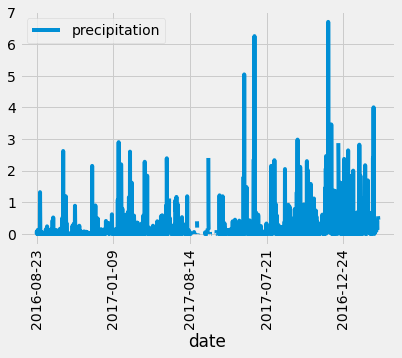

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_date.describe()

In [ ]:
	precipitation
count	2021.000000
mean	0.177279
std	0.461190
min	0.000000
25%	0.000000
50%	0.020000
75%	0.130000
max	6.70000

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.name)).all()
[(9,)]

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_avg_max = most_active[0][0]
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station == min_avg_max).all()

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == min_avg_max).\
                filter(Measurement.date >= one_year).all()
tobs_df = pd.DataFrame(temp_data)
tobs_df.set_index('station', inplace=False)
tobs_df.head()

tobs_df.plot.hist(by='station', bins=12, figsize=(12,8))
plt.grid()
plt.title("Temperature Observations for Station " + min_avg_max, fontsize=20)
plt.xlabel("Temperature Reported", fontsize=16)
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.show

# Close session

In [ ]:
# Close Session
session.close()